# Regras de Negócio
Aparência: sol, nublado, chuva

Temperatura: -135 ~ 130 F

Umidade: 0 ~ 100

Jogar: sim/nao

Tratar valores NAs




In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
dataset = pd.read_csv('tempo.csv',sep=';')
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


## Verificando quais dados são do tipo numérios


In [4]:
dataset.describe()

,Temperatura,Umidade
count,14.000000,13.000000
mean,155.571429,89.769231
std,306.433759,34.540203
min,64.000000,65.000000
25%,69.250000,70.000000
50%,73.500000,85.000000
75%,80.750000,90.000000
max,1220.000000,200.000000


## Conhecendo os dados Categóricos



### Vento

In [5]:
Vento =  dataset.groupby('Vento').size()
Vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<AxesSubplot:>

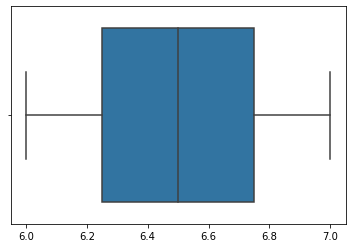

In [6]:
srn.boxplot(x = Vento)

In [7]:
#Valores nulos
dataset['Vento'].isnull().sum()

1

### Aparencia

In [8]:
dataset['Aparencia']

0         sol
1         sol
2     nublado
3       chuva
4       chuva
5       chuva
6       menos
7         sol
8         sol
9       chuva
10        sol
11    nublado
12    nublado
13      chuva
Name: Aparencia, dtype: object

In [9]:
Aparencia = dataset.groupby('Aparencia').size()
Aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:>

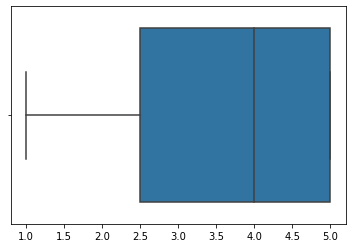

In [10]:
srn.boxplot(x = Aparencia)

<AxesSubplot:xlabel='Aparencia'>

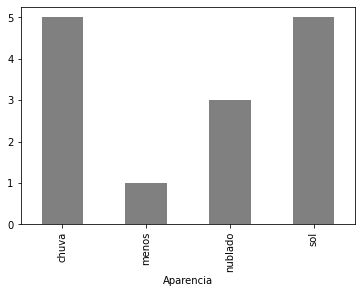

In [11]:
Aparencia.plot.bar(color = 'Gray')

In [12]:
dataset['Aparencia'].isnull().sum()

0

## Verificando Colunas Numéricas


### Temperatura

In [13]:
dataset['Temperatura']

0       85
1       80
2       83
3       70
4       68
5       65
6       64
7     1220
8       69
9       75
10      75
11      72
12      81
13      71
Name: Temperatura, dtype: int64

In [14]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

<AxesSubplot:xlabel='Temperatura'>

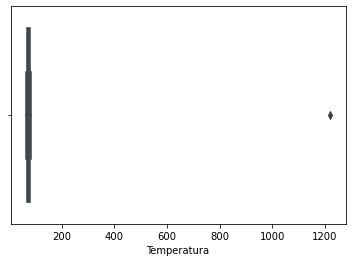

In [15]:
srn.boxplot(x = dataset['Temperatura'])

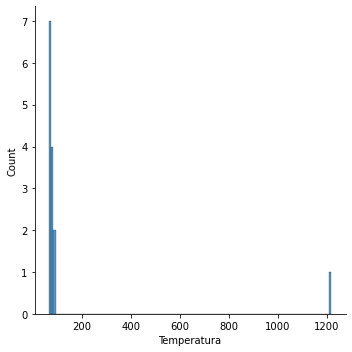

In [16]:
srn.displot(x = dataset['Temperatura'])

### Umidade

In [17]:
dataset['Umidade']

0      85.0
1      90.0
2      86.0
3       NaN
4      80.0
5      70.0
6      65.0
7      95.0
8      70.0
9     200.0
10     70.0
11     90.0
12     75.0
13     91.0
Name: Umidade, dtype: float64

In [18]:
dataset['Umidade'].isnull().sum()

1

<AxesSubplot:xlabel='Umidade'>

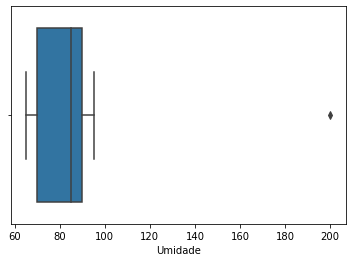

In [19]:
srn.boxplot(x = dataset['Umidade'])

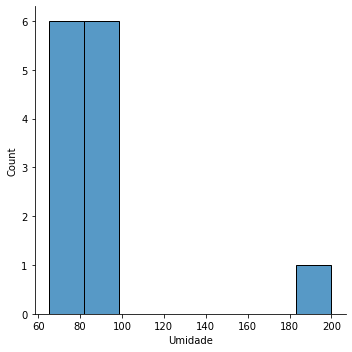

In [20]:
srn.displot(dataset['Umidade'])

## Tratamento de dados categóricos

### Dados nulos


In [38]:
dataset['Vento'].isnull().sum()

1

In [39]:
topVento = dataset['Vento'].describe().top
dataset['Vento'].fillna(topVento, inplace = True)
dataset['Vento'].isnull().sum()

0

### Dados fora de domínio

In [70]:
dataset.groupby('Aparencia').size()

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [27]:
topAparencia = dataset['Aparencia'].describe().top
dataset.loc[dataset['Aparencia'] == 'menos','Aparencia'] = topAparencia
dataset.groupby('Aparencia').size()

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [43]:
dataset.groupby('Aparencia').size()

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

## Dados Numéricos


### Dados Nulos



In [46]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          0
Jogar          0
dtype: int64

In [47]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

<AxesSubplot:xlabel='Umidade'>

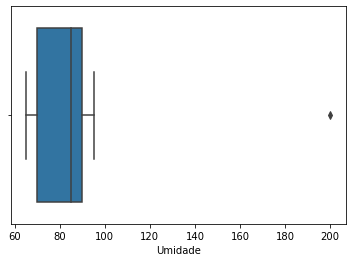

In [50]:
srn.boxplot(x = dataset['Umidade'])

In [61]:
mediana = sts.median(dataset['Umidade'])
dataset['Umidade'].fillna(mediana, inplace = True)
dataset['Umidade'].isnull().sum()

0

In [62]:
dataset['Umidade']

0      85.0
1      90.0
2      86.0
3      85.5
4      80.0
5      70.0
6      65.0
7      95.0
8      70.0
9     200.0
10     70.0
11     90.0
12     75.0
13     91.0
Name: Umidade, dtype: float64

In [72]:
dataset['Temperatura'].describe()



count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

<AxesSubplot:xlabel='Temperatura'>

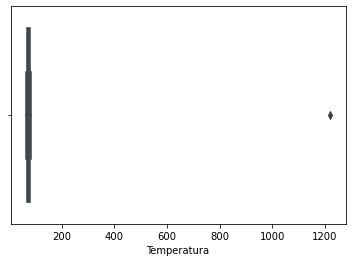

In [67]:
srn.boxplot(x = dataset['Temperatura'])


In [73]:
desvioPadrao = sts.stdev(dataset['Temperatura'])
desvioPadrao
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [74]:
dataset.loc[dataset['Temperatura'] >= 2*desvioPadrao, 'Temperatura'] 

7    1220
Name: Temperatura, dtype: int64

In [75]:
dataset.loc[dataset['Temperatura'] >= 2*desvioPadrao, 'Temperatura'] = mediana
dataset.loc[dataset['Temperatura'] >= 2*desvioPadrao, 'Temperatura']

Series([], Name: Temperatura, dtype: float64)